Importing modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# Importation du recensement de 1832

In [10]:
df = pd.read_csv("1832_v4_preprocessed.csv")

Defining the vocation categories and some colors into `vocation_classs`. Then we are storing informations in a potentially useful way in `df_`.

In [11]:
vocation_classs = [
    ("rente", (0, 1, 1)),
    ("administration", (0.2, 0.2, 1)),
    ("service", (0.3, 0.3, 1)),
    ("commerce", (0.4, 0.4, 1)),
    ("artisanat", (1, 0, 0)),
    ("construction", (1, 0.5, 0)),
    ("agricole", (0.5, 0.8, 0.5)),
]
data = {
    "division": [],
    "rente": [],
    "administration": [],
    "service": [],
    "commerce": [],
    "artisanat": [],
    "construction": [],
    "agricole": [],
}
divisions = df["division"].unique()
for division in divisions:
    data["division"].append(division)
    for vocation_class in data.keys():
        if vocation_class == "division": continue
        data[vocation_class].append(len(df.query("division == @division and chef_vocation_class == @vocation_class")))
        
df_ = pd.DataFrame(data)
df_["division"] = df_["division"].astype(str)
df_ = df_.sort_values(by="division").reset_index(drop=True)

# Distribution des classes de métiers par division (1/2)

La division '1-2' est composée de 26% de personnes dans la rente, 1% de personnes dans la administration, 18% de personnes dans la service, 4% de personnes dans la commerce, 22% de personnes dans la artisanat, 9% de personnes dans la construction, 19% de personnes dans la agricole
La division '3' est composée de 8% de personnes dans la rente, 1% de personnes dans la administration, 16% de personnes dans la service, 5% de personnes dans la commerce, 37% de personnes dans la artisanat, 13% de personnes dans la construction, 19% de personnes dans la agricole
La division '4' est composée de 32% de personnes dans la rente, 2% de personnes dans la administration, 19% de personnes dans la service, 17% de personnes dans la commerce, 25% de personnes dans la artisanat, 3% de personnes dans la construction, 2% de personnes dans la agricole
La division '5' est composée de 45% de personnes dans la rente, 3% de personnes dans la administration, 20% de personnes dans la service, 12% de personnes dan

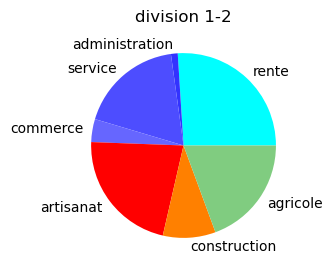

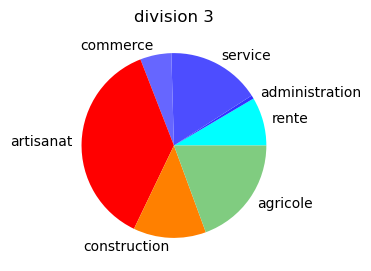

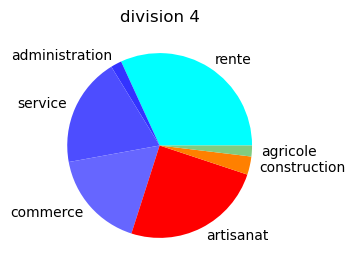

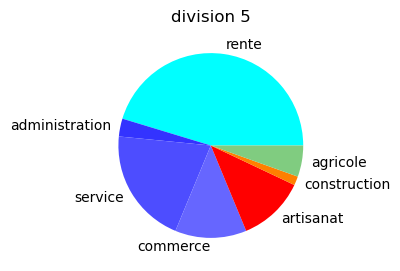

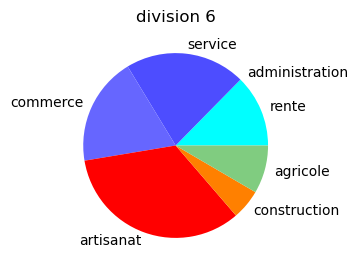

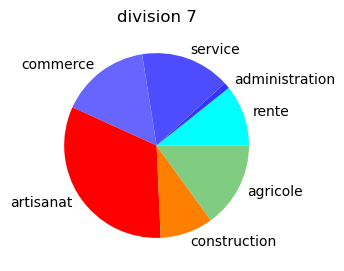

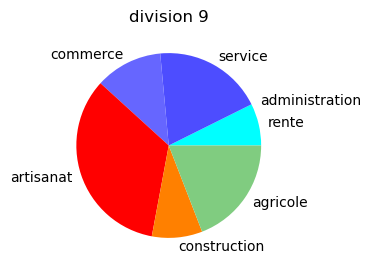

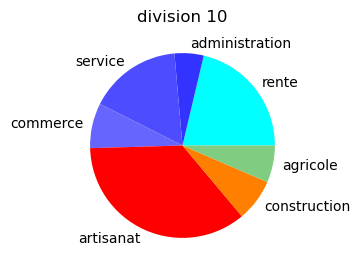

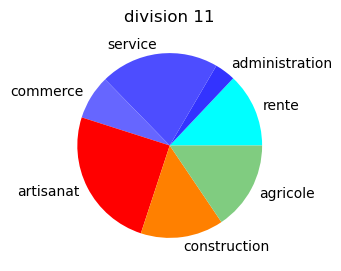

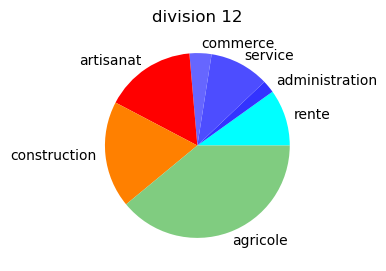

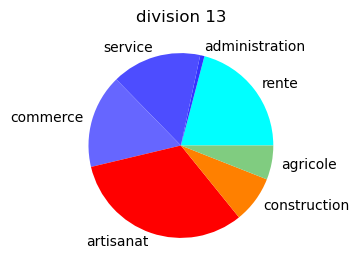

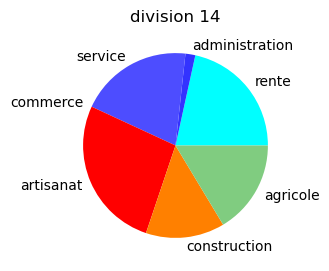

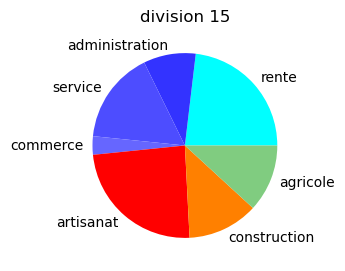

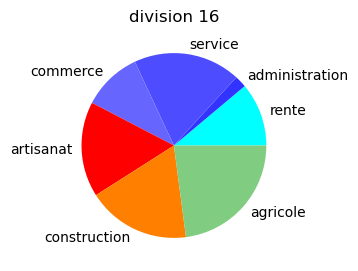

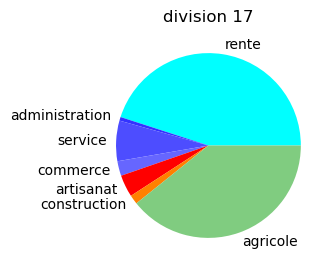

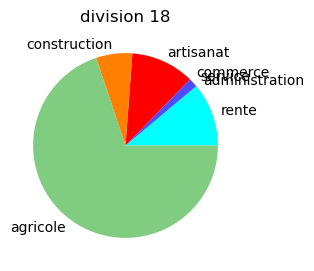

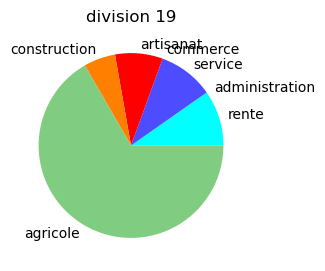

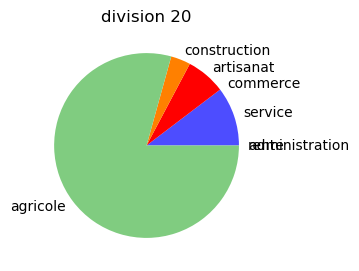

In [19]:
for division in divisions:
    # make pie chart
    counts = []
    for categorie, _ in vocation_classs:
        counts.append(len(df.query(f"division == @division & chef_vocation_class == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f"division {division}")
    plt.pie(counts, labels=[categorie for categorie, _ in vocation_classs], colors=[color for _, color in vocation_classs])
    message_to_print = f"La division '{division}' est composée de "
    for i, (categorie, _) in enumerate(vocation_classs):
        message_to_print += f"{counts[i]/np.array(counts).sum() * 100:.0f}% de personnes dans la {categorie}, "
    print(message_to_print[:-2])

# Distribution des classes de métiers par division (2/2)

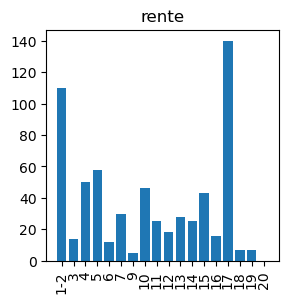

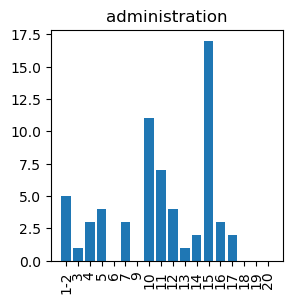

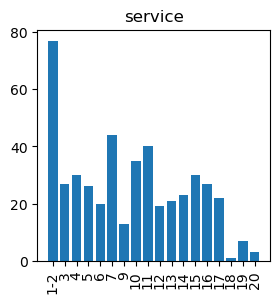

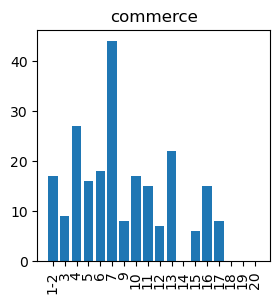

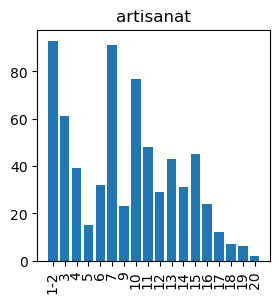

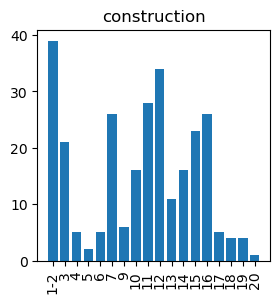

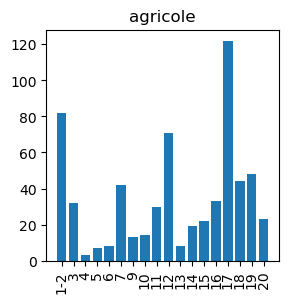

In [24]:
for categorie, _ in vocation_classs:
    # make pie chart
    counts = []
    for division in divisions:
        counts.append(len(df.query(f"division == @division & chef_vocation_class == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f"{categorie}")
    plt.bar(np.arange(len(divisions)), counts)
    plt.xticks(np.arange(len(divisions)), [division for division in divisions], rotation=90)
    # plt.legend(loc="left")

# Rues majeures de chaque division

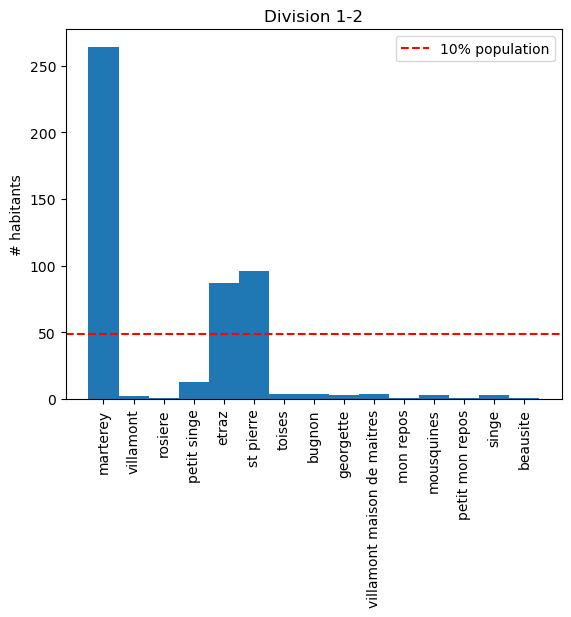

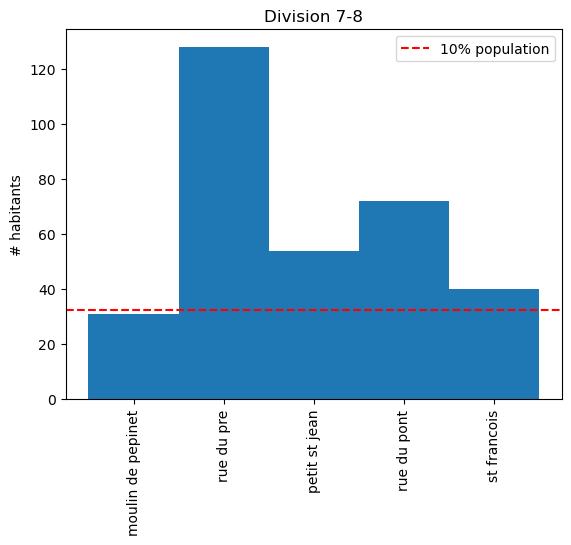

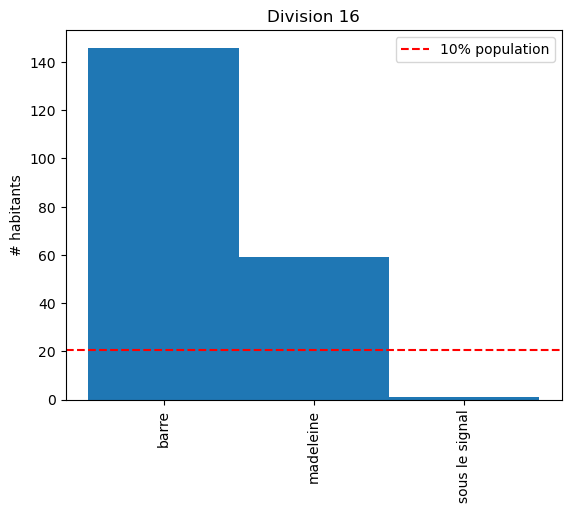

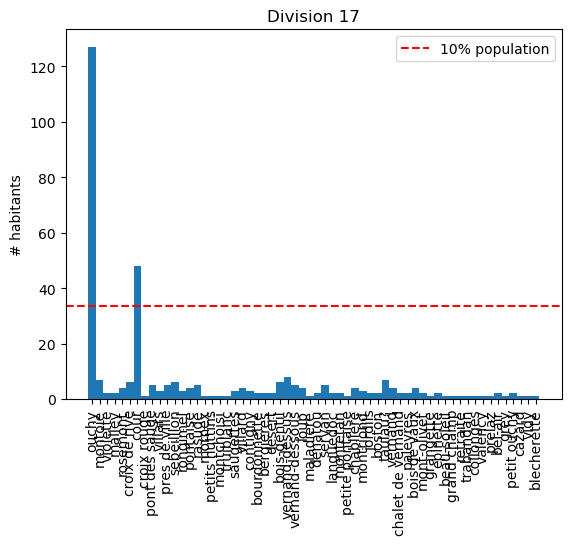

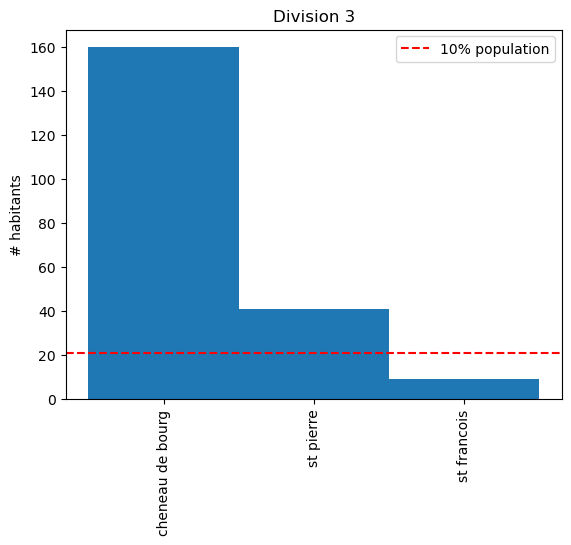

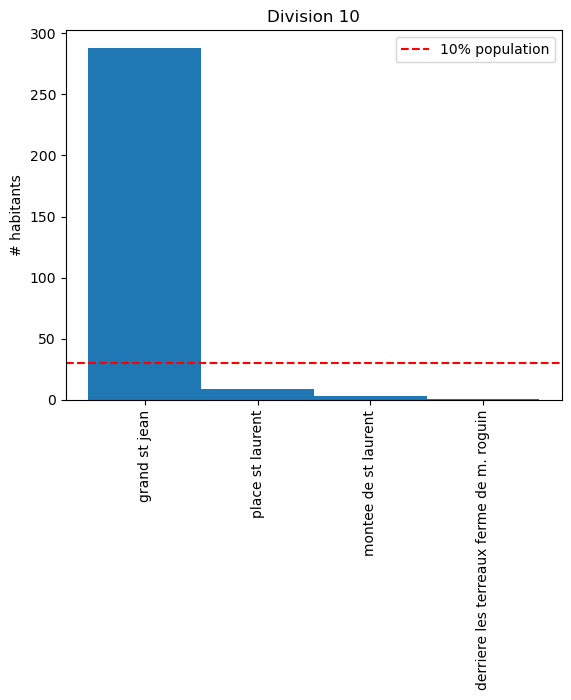

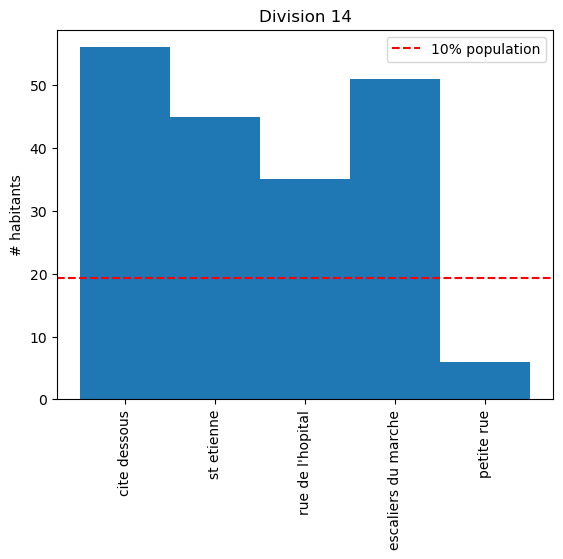

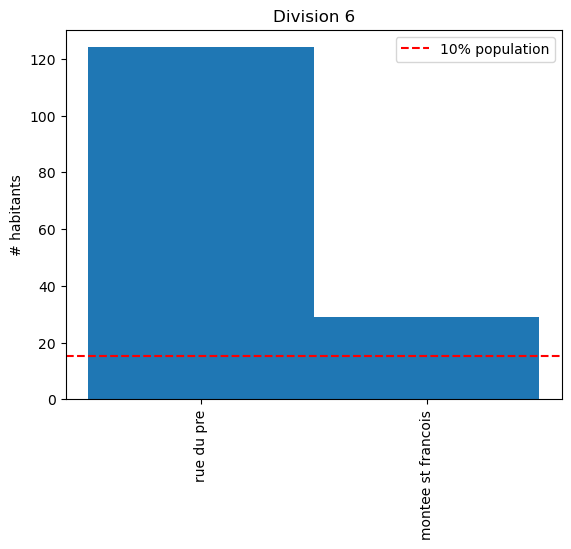

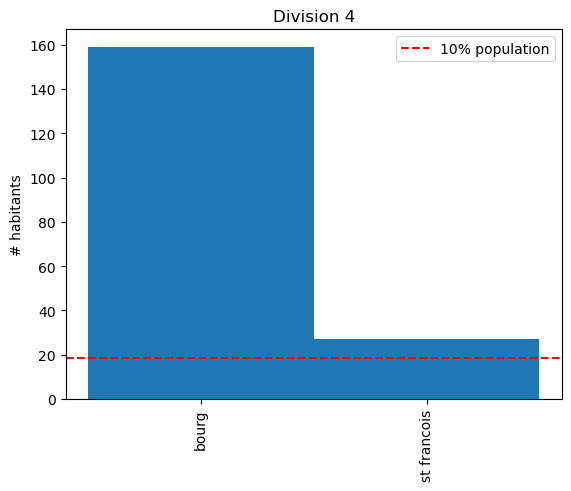

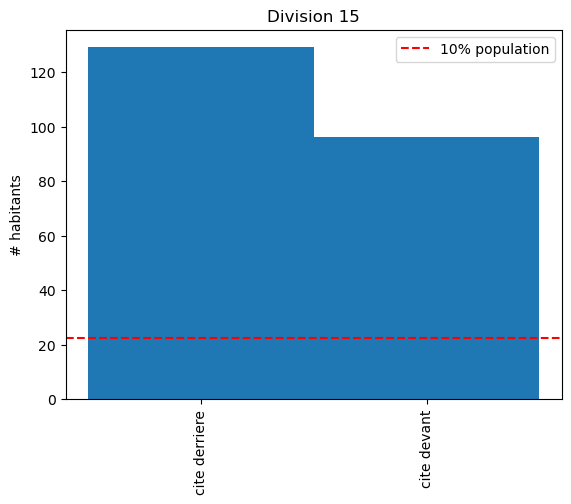

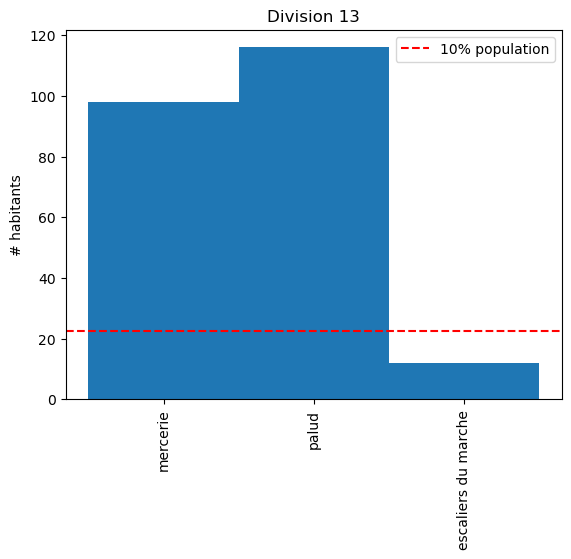

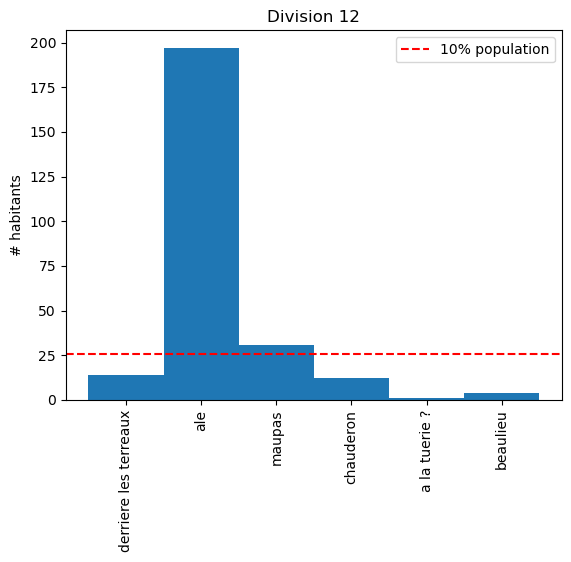

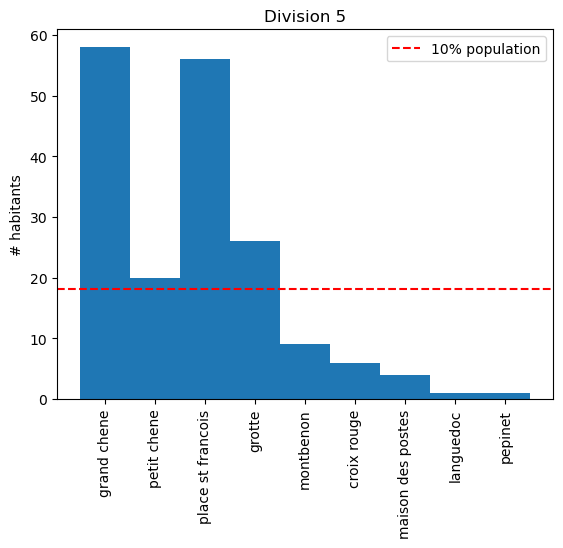

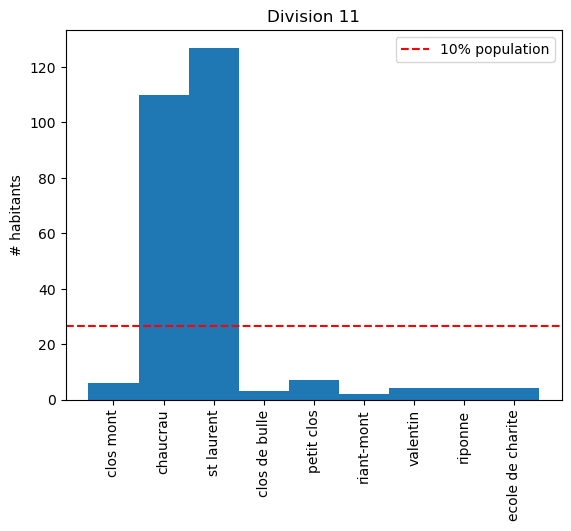

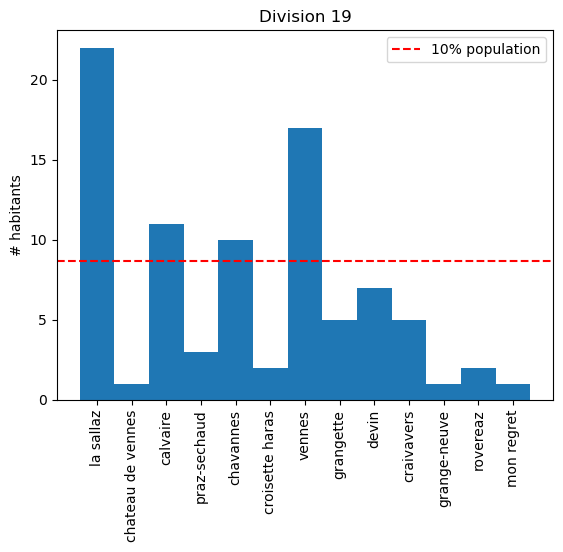

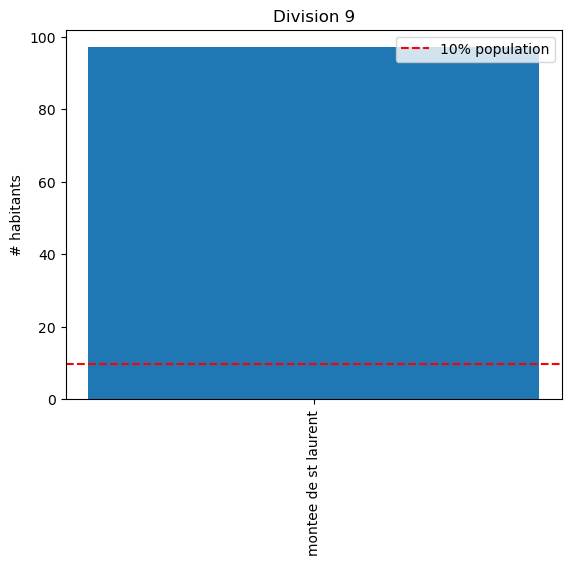

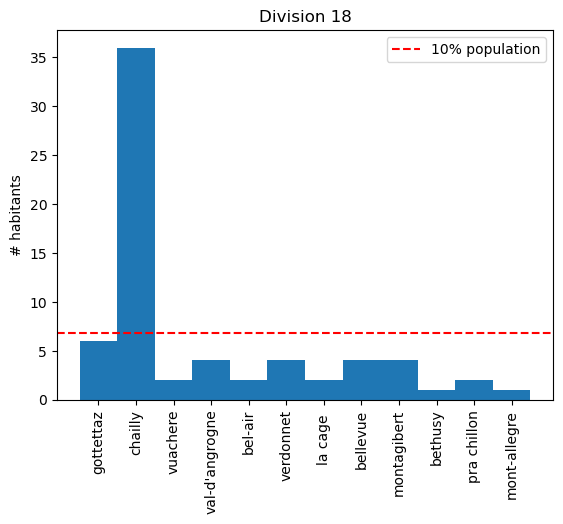

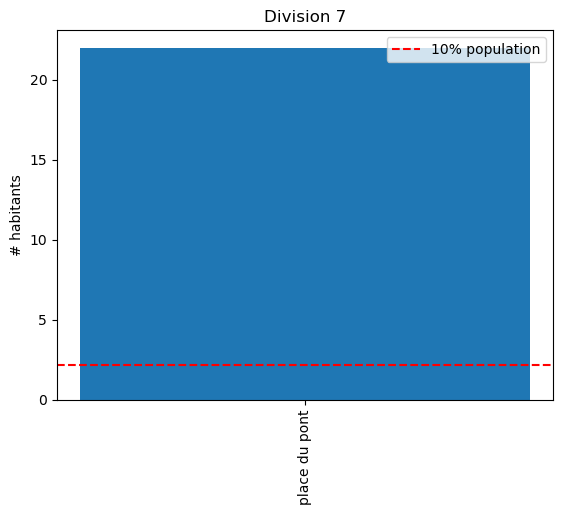

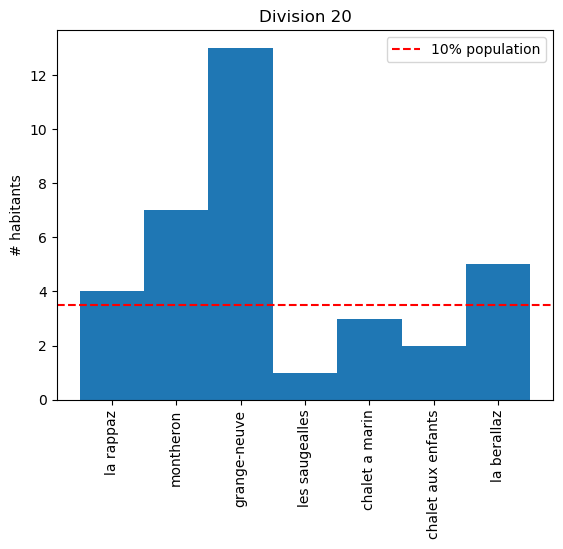

In [51]:
for division in divisions:
    # print(f"division {division}")
    df_ = df.query("division==@division")
    if len(df_) == 0: continue
    rues = df_["nom_rue_norm_2"].values
    plt.figure()
    plt.title(f"division {division}")
    plt.hist(rues, bins=np.arange(start=-0.5, stop=len(np.unique(rues))-0.5+1, step=1))
    plt.axhline(y=len(rues)*0.1, color="red", linestyle="--", label="10% population")
    plt.xticks(rotation=90)
    plt.ylabel("# habitants")
    plt.legend()
    # for rue in np.unique(rues):
        # print(f"{rue} {sum(rues==rue)}")
    # print("")

# Distribution des âges par division

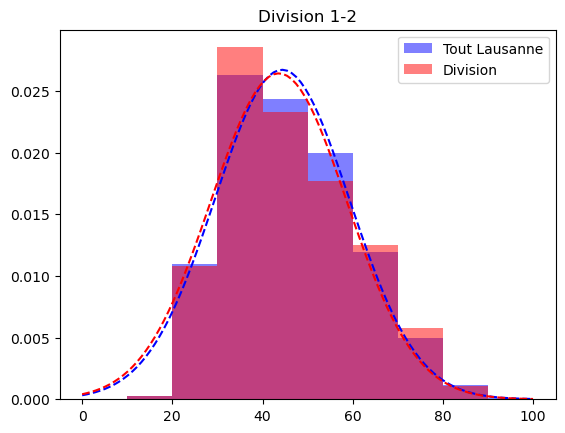

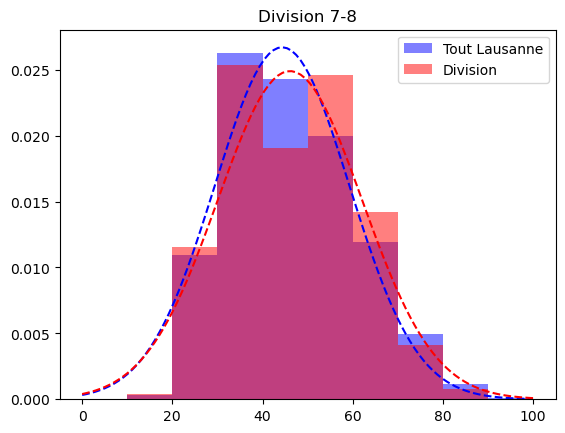

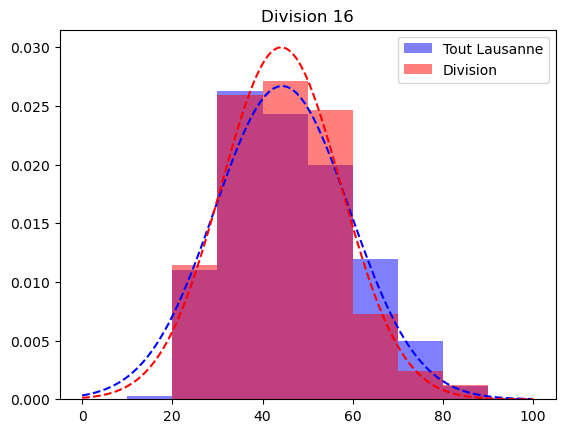

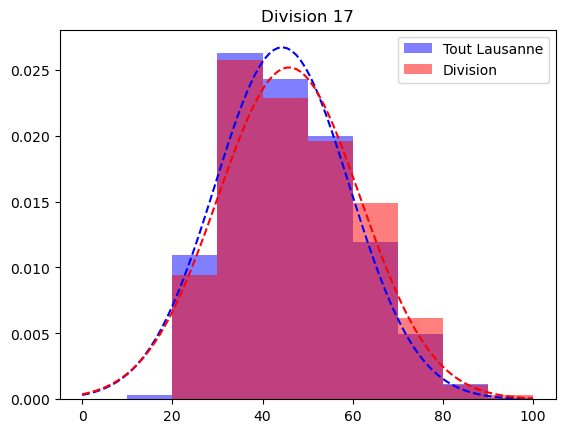

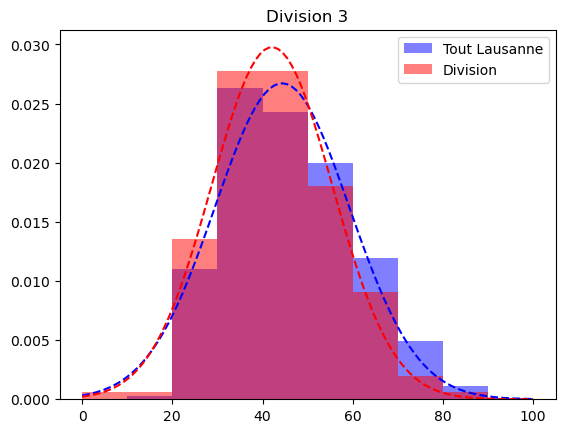

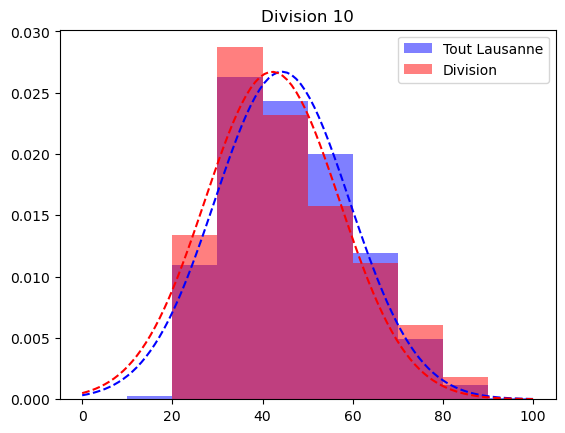

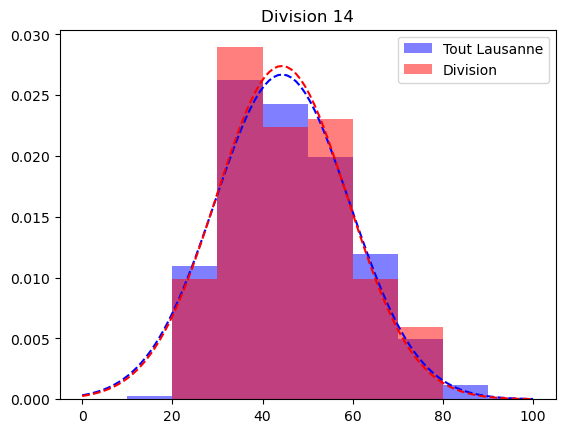

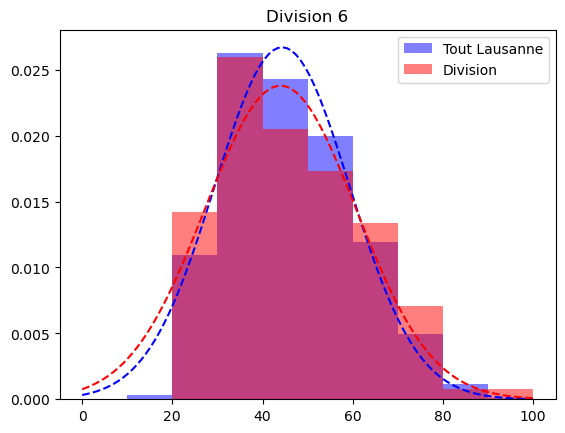

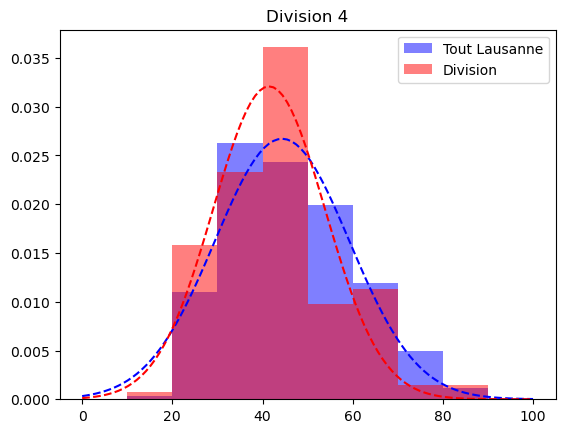

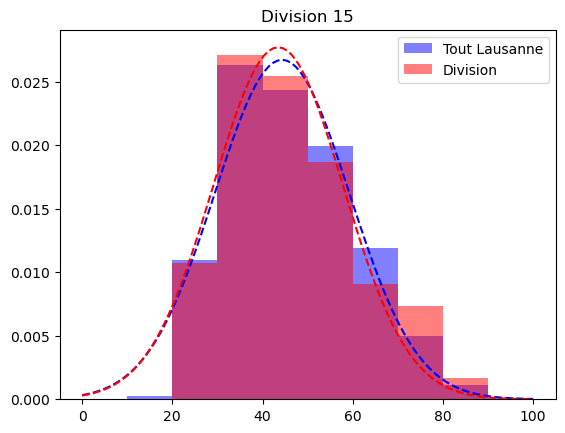

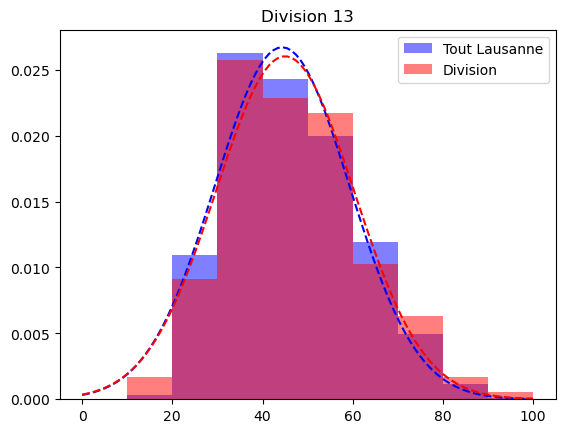

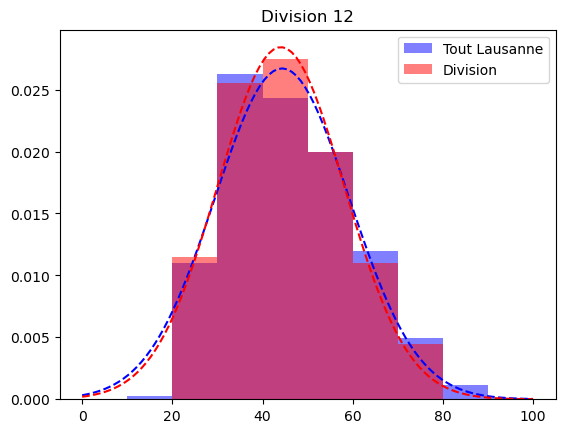

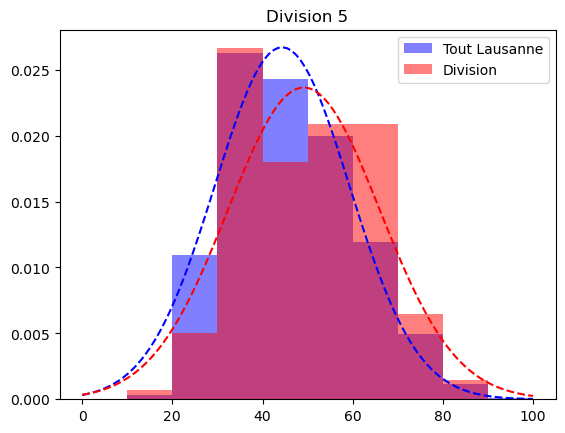

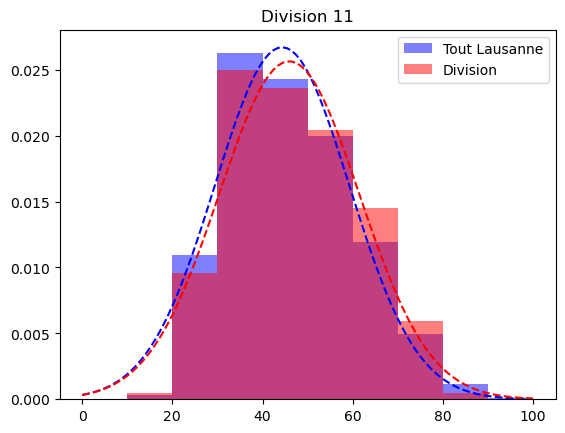

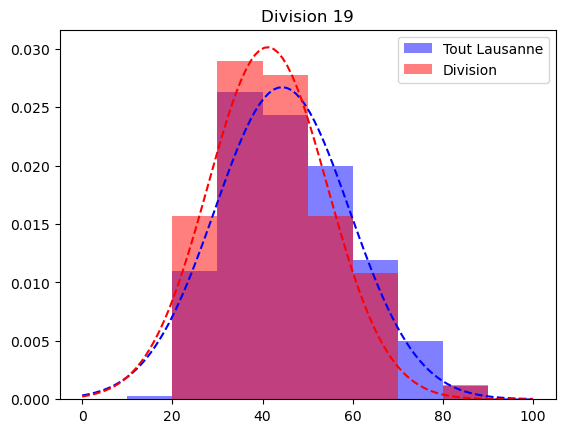

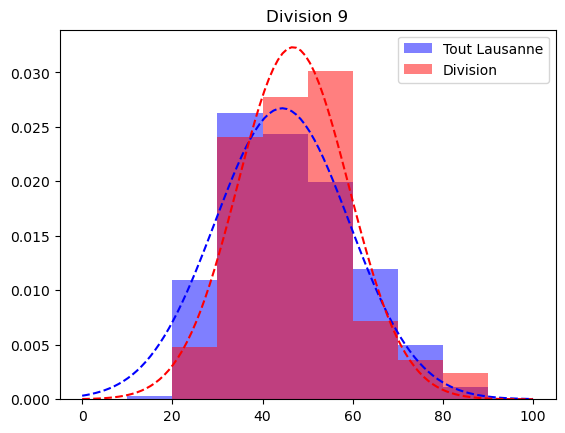

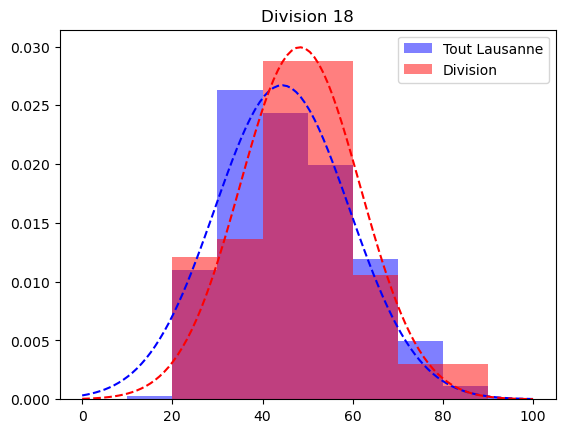

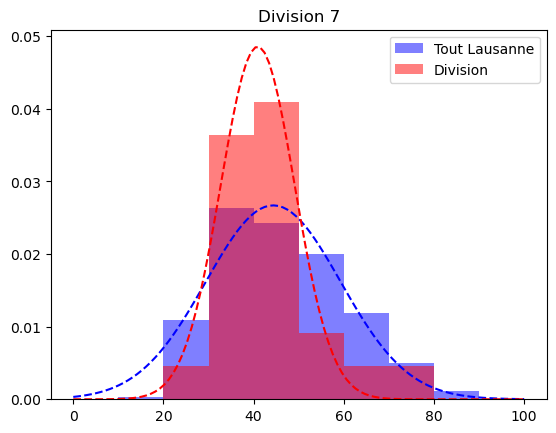

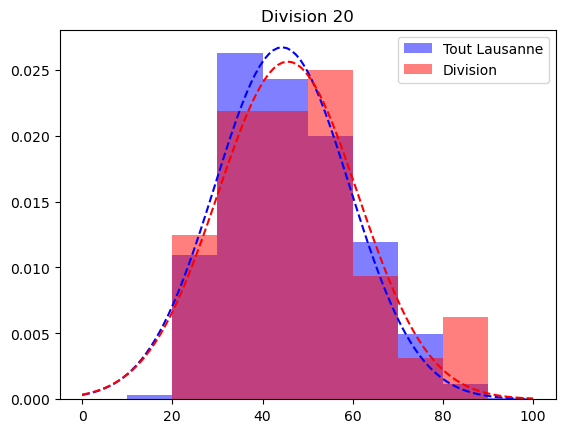

In [124]:
def gaussian(x: float, loc: float, scale: float) -> float:
    return 1 / (scale * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - loc) / scale) ** 2)

annee_naissances = df["chef_annee_naissance"].values
ages_global = []
for annee_naissance in annee_naissances:
    try:
        ages_global.append(1832 - int(annee_naissance))
    except:
        continue

for division in divisions:
    if division is np.nan: continue
    df_ = df.query(f"division == @division")
    annee_naissances = df_["chef_annee_naissance"].values
    ages = []
    for annee_naissance in annee_naissances:
        try:
            ages.append(1832 - int(annee_naissance))
        except:
            continue
    
    # make histogram
    bin_step = 10
    plt.figure()
    plt.title(f"division {division}")
    y, x, _ = plt.hist(ages_global, bins=np.arange(start=0, stop=100+1, step=bin_step), color=(0, 0, 1, 0.5), density=True, label="Tout Lausanne")
    popt, _ = curve_fit(gaussian, 0.5 * (x[1:] + x[:-1]), y, p0=[50, 10])
    X = np.linspace(0, 100, 100)
    plt.plot(X, gaussian(X, *popt), color="b", linestyle="--")
    y, x, _ = plt.hist(ages, bins=np.arange(start=0, stop=100+1, step=bin_step), density=True, color=(1, 0, 0, 0.5), label="division")
    popt, _ = curve_fit(gaussian, 0.5 * (x[1:] + x[:-1]), y, p0=[50, 10])
    X = np.linspace(0, 100, 100)
    plt.plot(X, gaussian(X, *popt), color="r", linestyle="--")
    plt.legend()


True

In [115]:
type(np.nan)

float

In [18]:
np.array([1, 2, 3]).sum()

6